In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import time
from copy import deepcopy
from Functions.Preprocess import read_neural_data as read
from Functions.Preprocess import preprocess_raw_data as prep
from Functions.Basics import myfft
from Functions.Preprocess import load
from Functions.Connectivity import PAC
from Functions.Utils import string_utils as su

# Read and Preprocess

In [2]:
data_save_path = './Data'
data_path = open('./Data/data_path.txt','r')
data_path = data_path.read()
data_path = su.find_string_between(data_path, 'Linux:')
rdata = read.read_neural_data(data_path)

In [3]:
prep_obj = prep.preprocess_raw_data(target_rate = 2000, target_tags = [20,40], epoch_time_int=[-5,10], save_path = data_save_path)
data_pp = prep_obj.fit(rdata)

Extract events based on target tags...
Downsample data to 2000Hz...
Band pass filter data based on filter_range:[0.5, 128]Hz...
Epoch data based on target tags...
The preprocessed data saved in "./Data/data_pp.pkl"


In [4]:
ERP_EV20 = np.mean(data_pp['ev20']['data'],axis=2)
ERP_EV40 = np.mean(data_pp['ev40']['data'],axis=2)

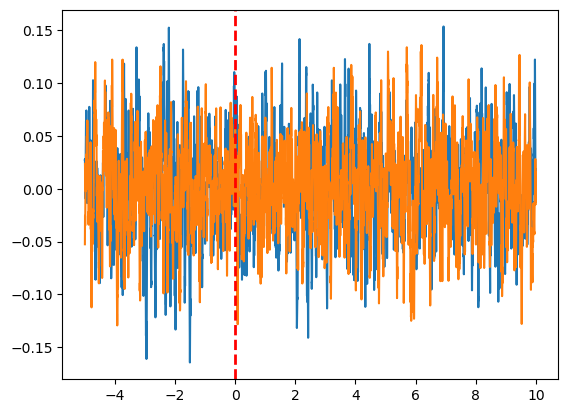

In [5]:
plt.plot(data_pp['time'],ERP_EV20[0,:])
plt.plot(data_pp['time'],ERP_EV40[0,:])
plt.axvline(0,color='r',linewidth=2,linestyle='--')
plt.show()

# Test Field

In [6]:
loaded_data = load.read_ppdata('./Data/data_pp.pkl')

In [21]:
# Calculation of dynamic PAC
PAC_all, tt, fph, famp = PAC.PAC_varTime_ts(loaded_data['ev20']['data'][0,:,1],loaded_data['ev20']['data'][3,:,1],loaded_data['srate'], twin = 1, tovp = 0.9, wavelet= 'cmor2.5-1.5')
tt = tt + loaded_data['time'][0]*1000

Runtime: 42.943699 seconds


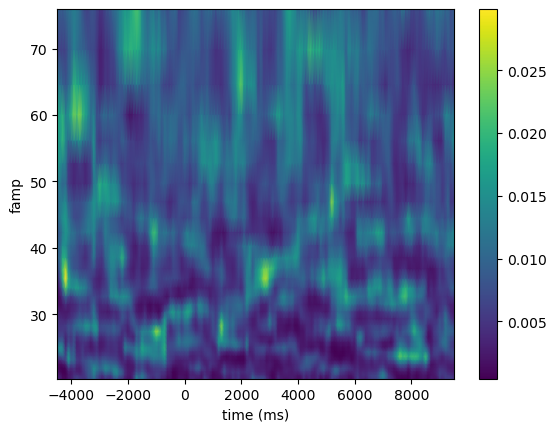

In [22]:
PAC_m = np.mean(PAC_all,axis=1)
plt.pcolormesh(tt,famp,PAC_m.T, shading='gouraud')
plt.xlabel('time (ms)')
plt.ylabel('famp')
plt.colorbar()
plt.show()

In [15]:
trial = 5
time = loaded_data['time']
PAC_all_c, fph, famp = PAC.PAC_comodulogram_ts(loaded_data['ev20']['data'][0,time>0,trial-1], loaded_data['ev20']['data'][3,time>0,trial-1], loaded_data['srate'], wavelet = 'cmor2.5-1.0')

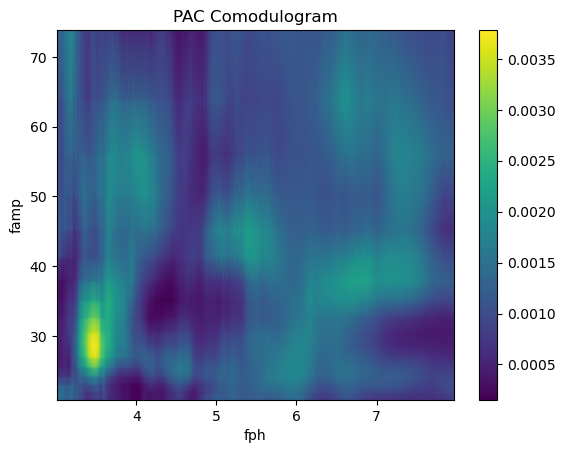

In [16]:
plt.pcolormesh(fph, famp, PAC_all_c.T, shading='gouraud')
plt.colorbar()
plt.xlabel('fph')
plt.ylabel('famp')
plt.title('PAC Comodulogram')
plt.show()